In [264]:
#importation de la bibliothèque numpy
import numpy as np

#importation de la bibliothèque pandas
import pandas as pd

#importation des bibliothèques de visualisation (matplotlib et seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTATION DES OUTILS DE LA BIBLIOTHEQUE SCIKIT-LEARN 

#importation de l'outil de division d'un dataframe en trainset et testset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

#importation des métriques 
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

#importation des modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle
from scipy.stats import ttest_ind

#importation d'une bibliothèque de gestion des erreurs
import warnings
warnings.filterwarnings('ignore') #pour ignorer les avertissements

In [187]:
data = pd.read_csv('Dataset.csv', sep=';', na_values='Unknown')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [188]:
df =  data.copy()

In [189]:
df = df.drop('CLIENTNUM', axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [191]:
df.isna().sum()/df.shape[0]*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

In [192]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [193]:
def quanti_quali_extraction(Dataframe):
    
    #Extraction du sous dataframe des variables quantitatives
    quantitative_columns_list = []
    for col in Dataframe.select_dtypes('float64'):
        quantitative_columns_list.append(col)
    for col in Dataframe.select_dtypes('int64'):
            quantitative_columns_list.append(col)
            
    Dataframe_quanti = pd.DataFrame(Dataframe, columns = quantitative_columns_list)
    
    #Extraction du sous dataframe des variables qualitatives
    qualitative_columns_list = []
    for col in Dataframe.select_dtypes('object'):
        qualitative_columns_list.append(col)
    
    Dataframe_quali = pd.DataFrame(Dataframe, columns=qualitative_columns_list)
    
    return quantitative_columns_list, Dataframe_quanti, qualitative_columns_list, Dataframe_quali

In [194]:
quanti, df_quanti, quali, df_quali = quanti_quali_extraction(df)

In [195]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

le pourcentage des clients ayant fermés le service de carte de crédit est de 16.065962279055988 %
le pourcentage des clients ayant conservés leur carte de crédit est de 83.934037720944 %


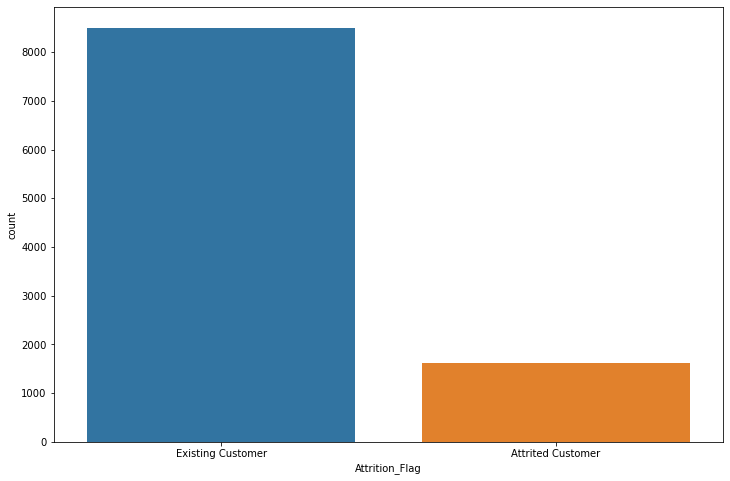

In [196]:
plt.figure(figsize=(12,8))
sns.countplot(df['Attrition_Flag'])
Existing_Customer = df['Attrition_Flag'].value_counts()[0]/len(df['Attrition_Flag'])*100
Attrited_Customer = df['Attrition_Flag'].value_counts()[1]/len(df['Attrition_Flag'])*100
print(f"le pourcentage des clients ayant fermés le service de carte de crédit est de {Attrited_Customer} %")
print(f"le pourcentage des clients ayant conservés leur carte de crédit est de {Existing_Customer} %")

In [197]:
quali

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [198]:
quali.remove('Attrition_Flag')
quali

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

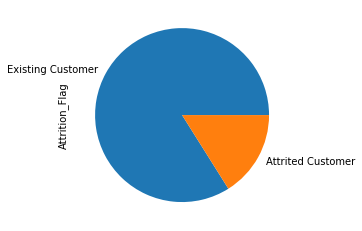

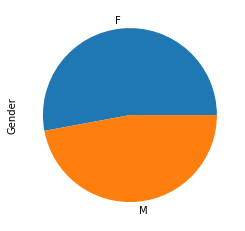

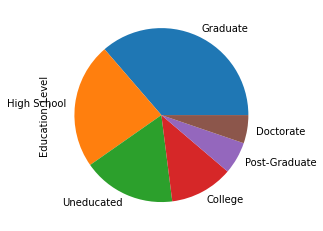

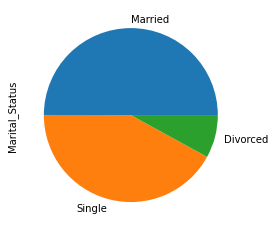

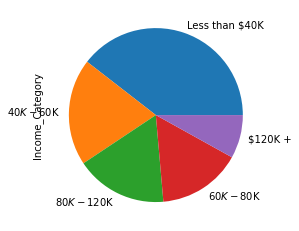

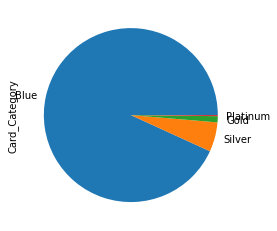

In [199]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [200]:
quanti

['Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

Représentation graphique de la variable: Credit_Limit


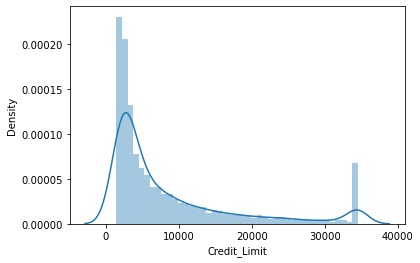

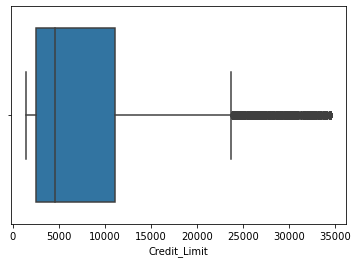

Représentation graphique de la variable: Avg_Open_To_Buy


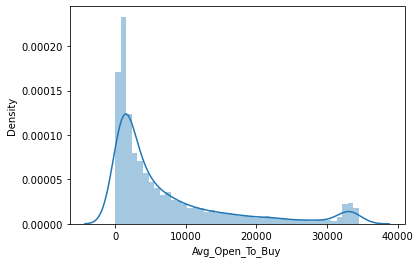

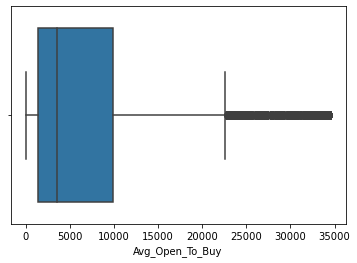

Représentation graphique de la variable: Total_Amt_Chng_Q4_Q1


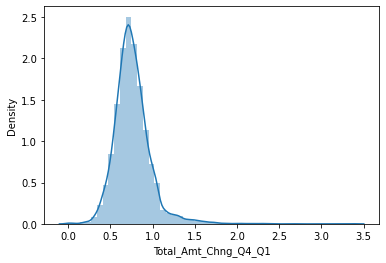

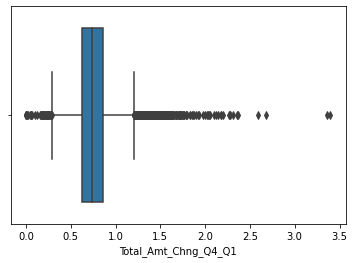

Représentation graphique de la variable: Total_Ct_Chng_Q4_Q1


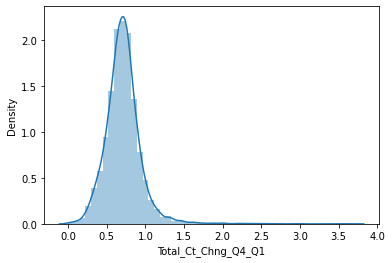

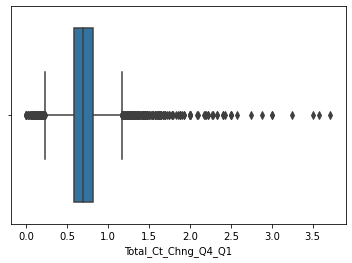

Représentation graphique de la variable: Avg_Utilization_Ratio


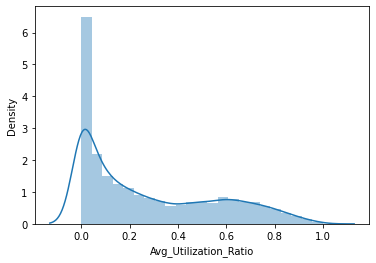

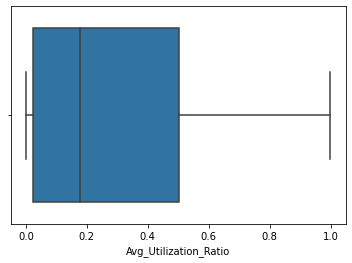

Représentation graphique de la variable: Customer_Age


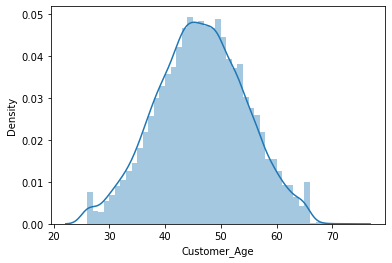

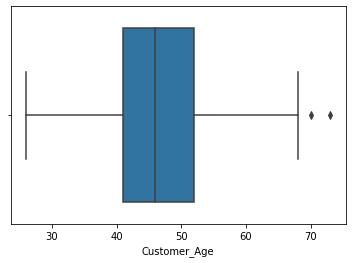

Représentation graphique de la variable: Dependent_count


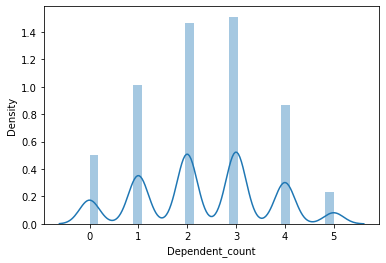

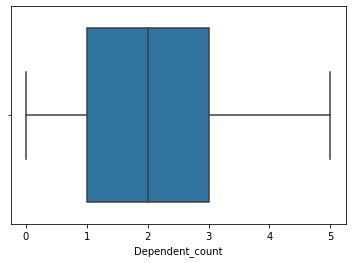

Représentation graphique de la variable: Months_on_book


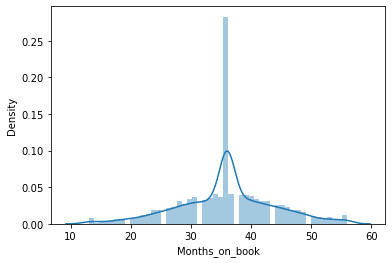

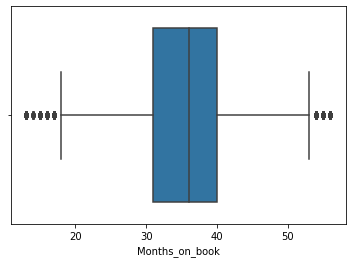

Représentation graphique de la variable: Total_Relationship_Count


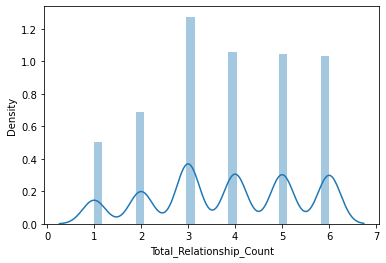

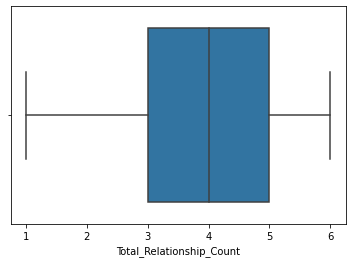

Représentation graphique de la variable: Months_Inactive_12_mon


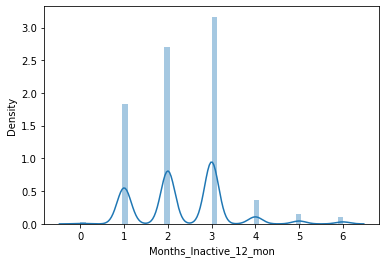

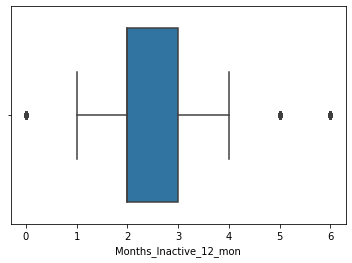

Représentation graphique de la variable: Contacts_Count_12_mon


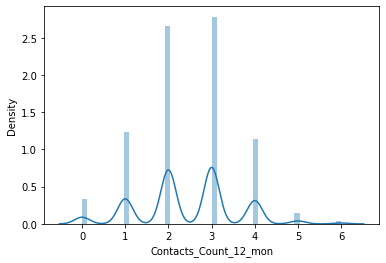

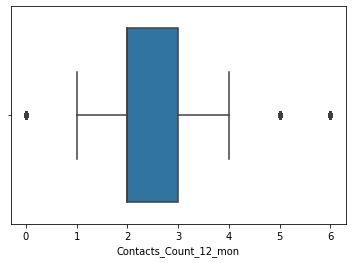

Représentation graphique de la variable: Total_Revolving_Bal


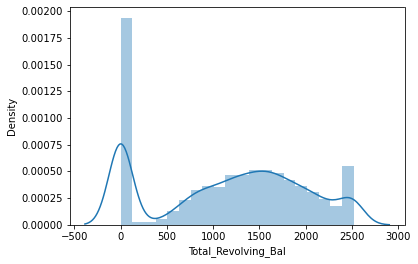

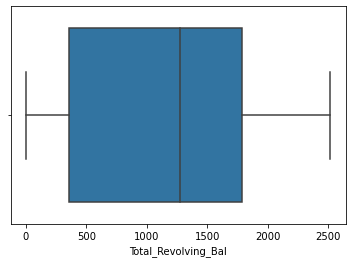

Représentation graphique de la variable: Total_Trans_Amt


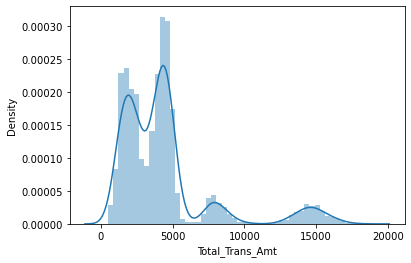

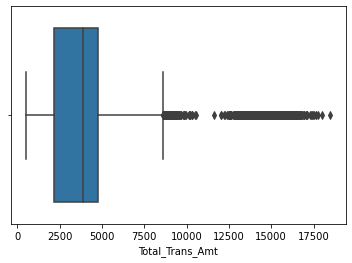

Représentation graphique de la variable: Total_Trans_Ct


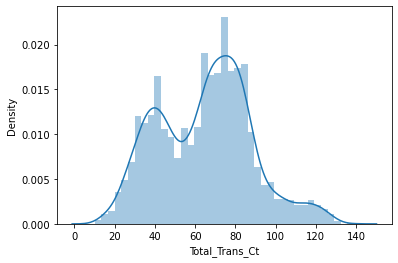

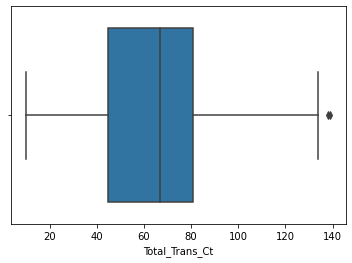

In [201]:
for col in df_quanti:
    plt.figure()
    print(f"Représentation graphique de la variable: {col}")
    sns.distplot(df[col])
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print("="*60)

Relation entre " Attrition_Flag " & " Gender "


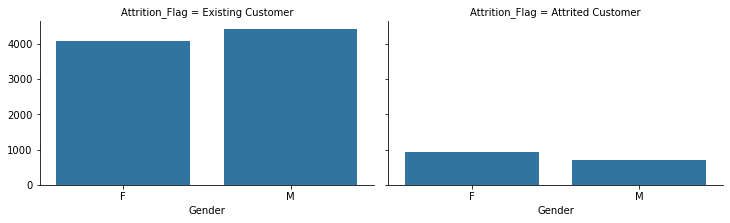

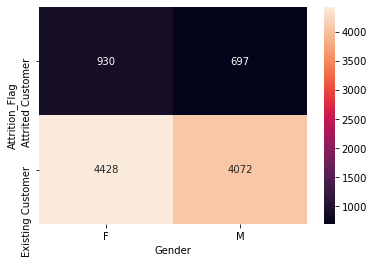

Relation entre " Attrition_Flag " & " Education_Level "


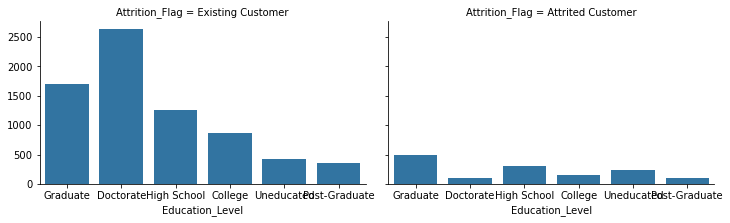

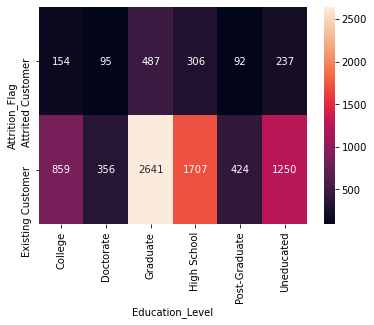

Relation entre " Attrition_Flag " & " Marital_Status "


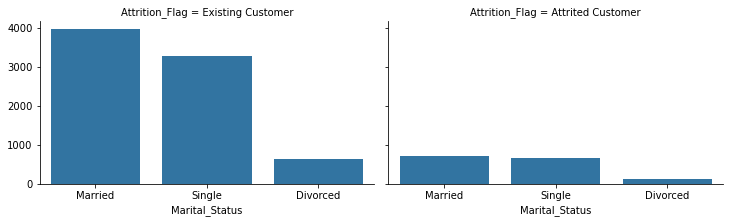

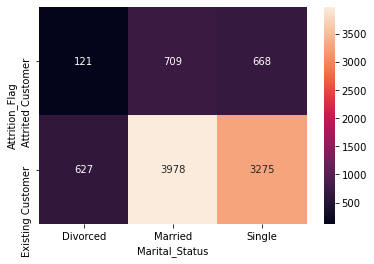

Relation entre " Attrition_Flag " & " Income_Category "


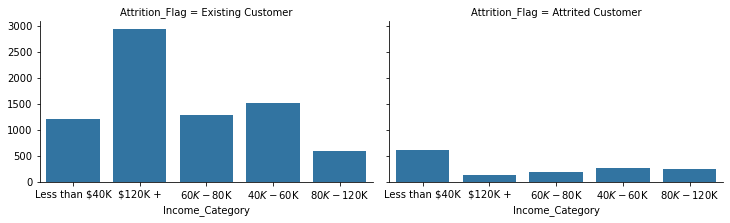

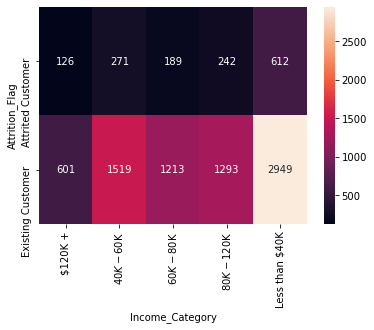

Relation entre " Attrition_Flag " & " Card_Category "


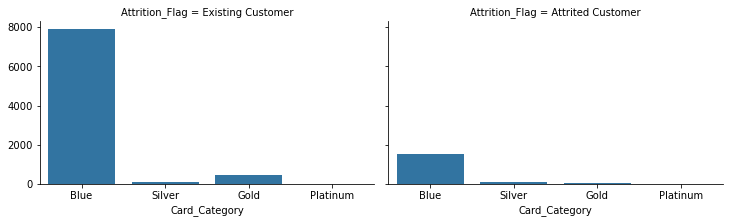

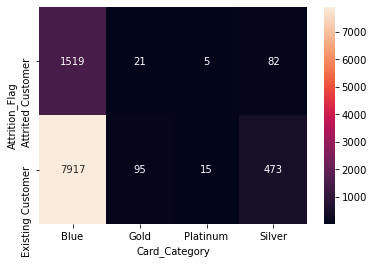

In [202]:
for i in quali:
    print("Relation entre",'"',"Attrition_Flag",'" &','"',i,'"')
    grid = sns.FacetGrid(df, col='Attrition_Flag', size=3.2, aspect=1.6)
    grid.map(sns.countplot,i)
    plt.show()
    sns.heatmap(pd.crosstab(df['Attrition_Flag'], df[i]), annot=True, fmt='d')
    plt.show()
    print('='*70)

In [203]:
df_Existing_Customer = df[df['Attrition_Flag'] == 'Existing Customer']

In [204]:
df_Attrited_Customer = df[df['Attrition_Flag'] == 'Attrited Customer']

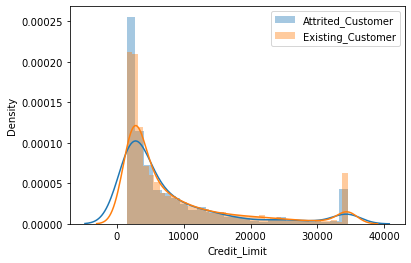

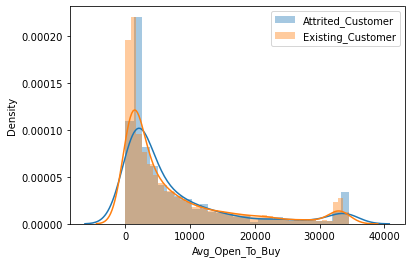

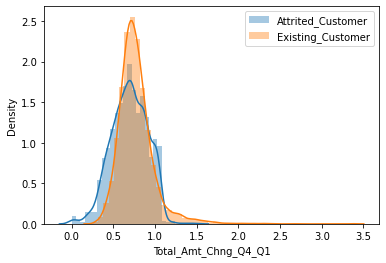

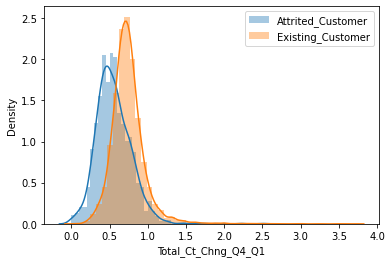

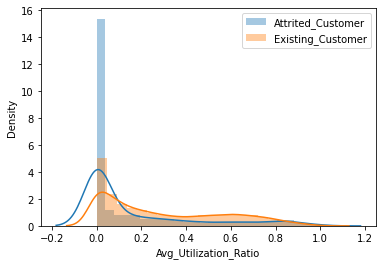

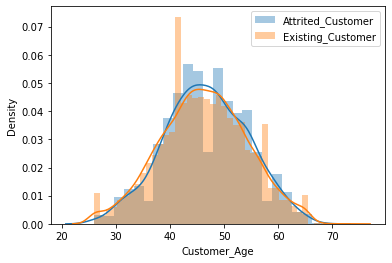

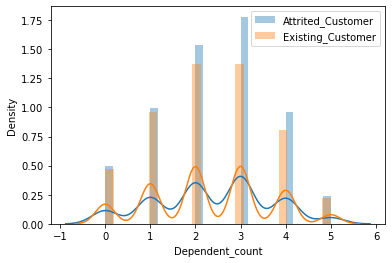

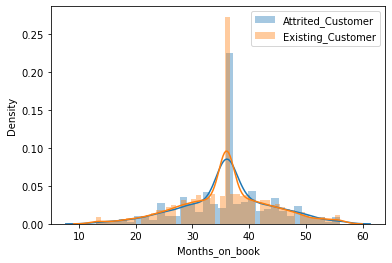

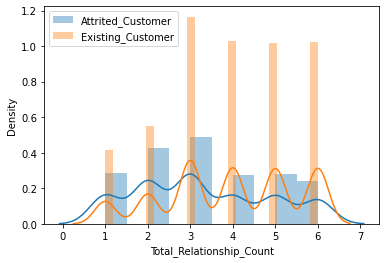

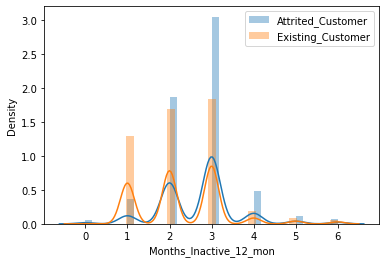

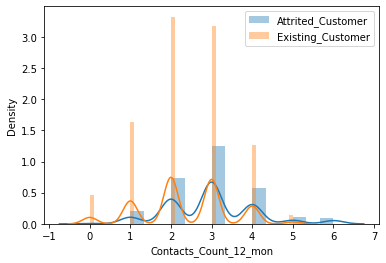

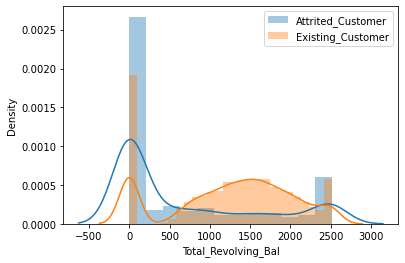

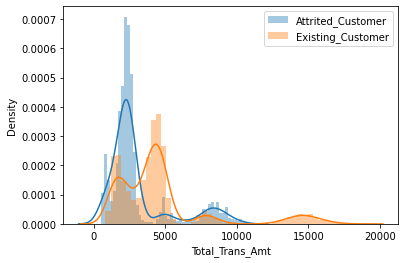

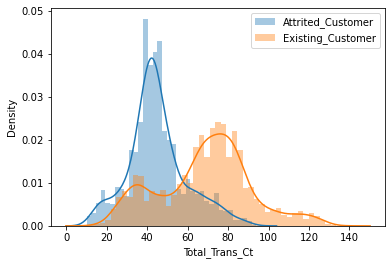

In [205]:
for col in df_quanti.columns:
    plt.figure()
    sns.distplot(df_Attrited_Customer[col], label='Attrited_Customer')
    sns.distplot(df_Existing_Customer[col], label='Existing_Customer')
    plt.legend()

## Analyse avancée des variables (Test d'hypothèses)

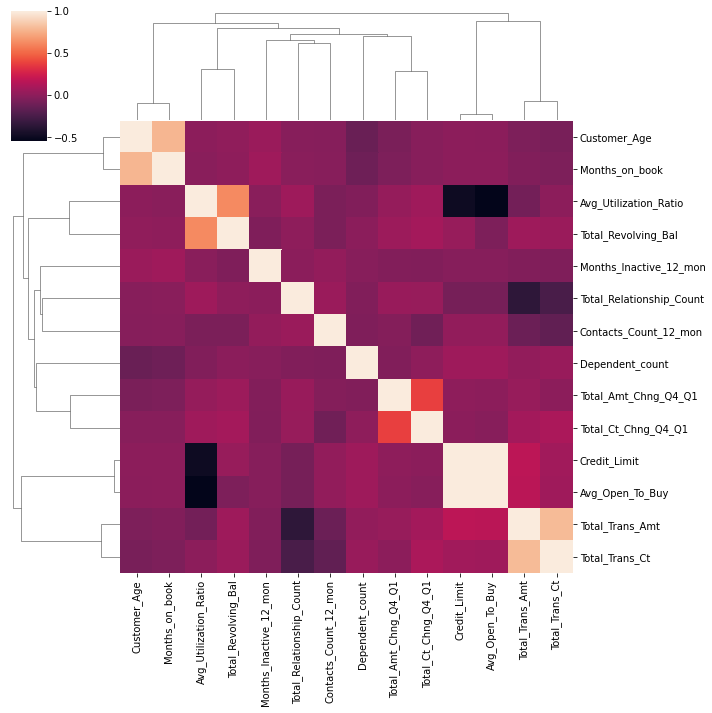

In [206]:
sns.clustermap(df_quanti.corr())

In [207]:
df_Attrited_Customer.shape

(1627, 20)

In [208]:
balanced_neg = df_Existing_Customer.sample(df_Attrited_Customer.shape[0])

In [209]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), df_Attrited_Customer[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 0

In [210]:
for col in df_quanti:
    print(f"{col}:", "--"*20, f"{t_test(col)}")

Credit_Limit: ---------------------------------------- 0
Avg_Open_To_Buy: ---------------------------------------- 0
Total_Amt_Chng_Q4_Q1: ---------------------------------------- H0 rejetée
Total_Ct_Chng_Q4_Q1: ---------------------------------------- H0 rejetée
Avg_Utilization_Ratio: ---------------------------------------- H0 rejetée
Customer_Age: ---------------------------------------- H0 rejetée
Dependent_count: ---------------------------------------- 0
Months_on_book: ---------------------------------------- 0
Total_Relationship_Count: ---------------------------------------- H0 rejetée
Months_Inactive_12_mon: ---------------------------------------- H0 rejetée
Contacts_Count_12_mon: ---------------------------------------- H0 rejetée
Total_Revolving_Bal: ---------------------------------------- H0 rejetée
Total_Trans_Amt: ---------------------------------------- H0 rejetée
Total_Trans_Ct: ---------------------------------------- H0 rejetée


## PREPROCESSING

In [300]:
def train_test_split(Dataframe):
    
    df_without_target = Dataframe.drop('Attrition_Flag', axis=1)
    target = Dataframe['Attrition_Flag']
    print(target.value_counts())
    
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
    for train, test in sss.split(df_without_target,target):
        X_train, X_test = df_without_target.iloc[train],df_without_target.iloc[test]
        y_train, y_test = target.iloc[train],target.iloc[test]

    print('X_train taille: ', X_train.shape)
    print('X_test taille: ', X_test.shape)
    print('y_train taille: ', y_train.shape)
    print('y_test taille: ', y_test.shape)
    
    return df_without_target,target

In [301]:
numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [302]:
preprocessor = make_column_transformer((numerical_pipeline, quanti),
                                       (categorical_pipeline, ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']))

In [303]:
#Fonction d'évaluation de modèles (au minimum deux(2) modèles) 

def evaluation(model_name):
    
        model = make_pipeline(preprocessor, model_name)
        model.fit(X_train, y_train)
        
        print('EVALUATION DU MODELE:', model_name, "\n")

        y_train_pred = model.predict(X_train)
        print('La matrice de confusion du modèle pour le trainset est: \n', confusion_matrix(y_train, y_train_pred))
        print('\n Rapport total du modèle utilisé pour le trainset : \n')
        print(classification_report(y_train, y_train_pred), '\n\n')

        y_pred = model.predict(X_test)
        print('La matrice de confusion du modèle pour le testset est: \n', confusion_matrix(y_test, y_pred))
        print('\n Rapport total du modèle utilisé pour le testset : \n')
        print(classification_report(y_test, y_pred))

        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))
        plt.figure(figsize=(12,8))
        plt.title(f"Courbe train-test du modèle {model_name}")
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()        

In [304]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = LogisticRegression(random_state=0, solver='liblinear')
model_3 = SVC(kernel='rbf', random_state=0)
model_4 = RandomForestClassifier(random_state=0, n_estimators=100)
model_5 = BaggingClassifier(base_estimator= KNeighborsClassifier(), n_estimators=100, random_state=0)
model_6 = AdaBoostClassifier(n_estimators=101, random_state=0)
model_7 = KNeighborsClassifier(n_neighbors=101, algorithm='ball_tree', leaf_size = 40)

EVALUATION DU MODELE: AdaBoostClassifier(n_estimators=101, random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[1041  130]
 [  94 5823]]

 Rapport total du modèle utilisé pour le trainset : 

                   precision    recall  f1-score   support

Attrited Customer       0.92      0.89      0.90      1171
Existing Customer       0.98      0.98      0.98      5917

         accuracy                           0.97      7088
        macro avg       0.95      0.94      0.94      7088
     weighted avg       0.97      0.97      0.97      7088
 


La matrice de confusion du modèle pour le testset est: 
 [[ 385   71]
 [  53 2530]]

 Rapport total du modèle utilisé pour le testset : 

                   precision    recall  f1-score   support

Attrited Customer       0.88      0.84      0.86       456
Existing Customer       0.97      0.98      0.98      2583

         accuracy                           0.96      3039
        macro avg       0.93      0.91      0.9

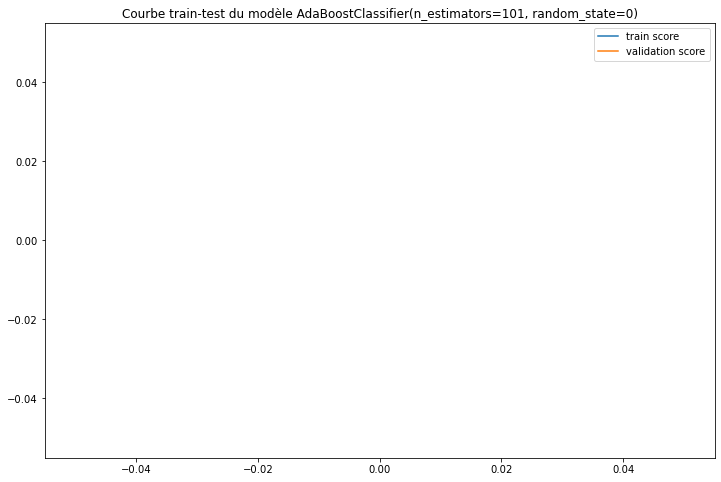

In [305]:
evaluation(model_6)

In [306]:
df_final = df[['Gender','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon','Avg_Utilization_Ratio','Total_Relationship_Count','Attrition_Flag']]

In [307]:
df_final

,Gender,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon,Avg_Utilization_Ratio,Total_Relationship_Count,Attrition_Flag
0,M,Married,$60K - $80K,Blue,1,0.061,5,Existing Customer
1,F,Single,Less than $40K,Blue,1,0.105,6,Existing Customer
2,M,Married,$80K - $120K,Blue,1,0.000,4,Existing Customer
3,F,NaN,Less than $40K,Blue,4,0.760,3,Existing Customer
4,M,Married,$60K - $80K,Blue,1,0.000,5,Existing Customer
...,...,...,...,...,...,...,...,...
10122,M,Single,$40K - $60K,Blue,2,0.462,3,Existing Customer
10123,M,Divorced,$40K - $60K,Blue,2,0.511,4,Attrited Customer
10124,F,Married,Less than $40K,Blue,3,0.000,5,Attrited Customer
10125,M,NaN,$40K - $60K,Blue,3,0.000,4,Attrited Customer


In [309]:
X,y = train_test_split(df_final)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
X_train taille:  (7088, 7)
X_test taille:  (3039, 7)
y_train taille:  (7088,)
y_test taille:  (3039,)


In [319]:
preprocessor = make_column_transformer((numerical_pipeline, ['Months_Inactive_12_mon','Avg_Utilization_Ratio','Total_Relationship_Count'] ),
                                       (categorical_pipeline, ['Gender','Marital_Status','Income_Category','Card_Category']))

In [320]:
classifier = make_pipeline(preprocessor, model_6)

In [321]:
classifier.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Months_Inactive_12_mon',
                                                   'Avg_Utilization_Ratio',
                                                   'Total_Relationship_Count']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('o

In [322]:
pickle.dump(classifier, open('model_final.pkl','wb'))